In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata238.xlsx', index_col=0)

In [3]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE', 'ASBG10A', 'ASBG10B', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05', 'MINAGEARRIVAL'


In [4]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
df_experience = df[identifier_columns+negativeexperience_in_school_columns]

In [6]:
pivot_df_experienceinschool = df_experience.pivot_table(values=negativeexperience_in_school_columns, index=identifier_columns, aggfunc='mean')

<Figure size 1080x720 with 0 Axes>

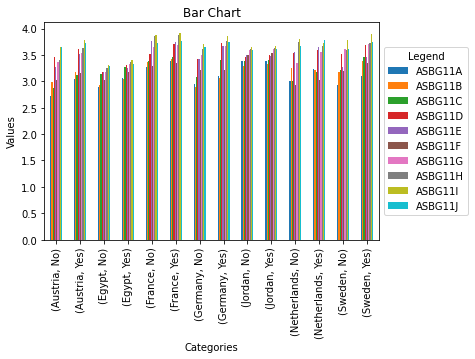

In [7]:
plt.figure(figsize=(15,10))
ax3 = pivot_df_experienceinschool.plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
# Move the legend outside the plot
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

**This is too small - make it bigger**

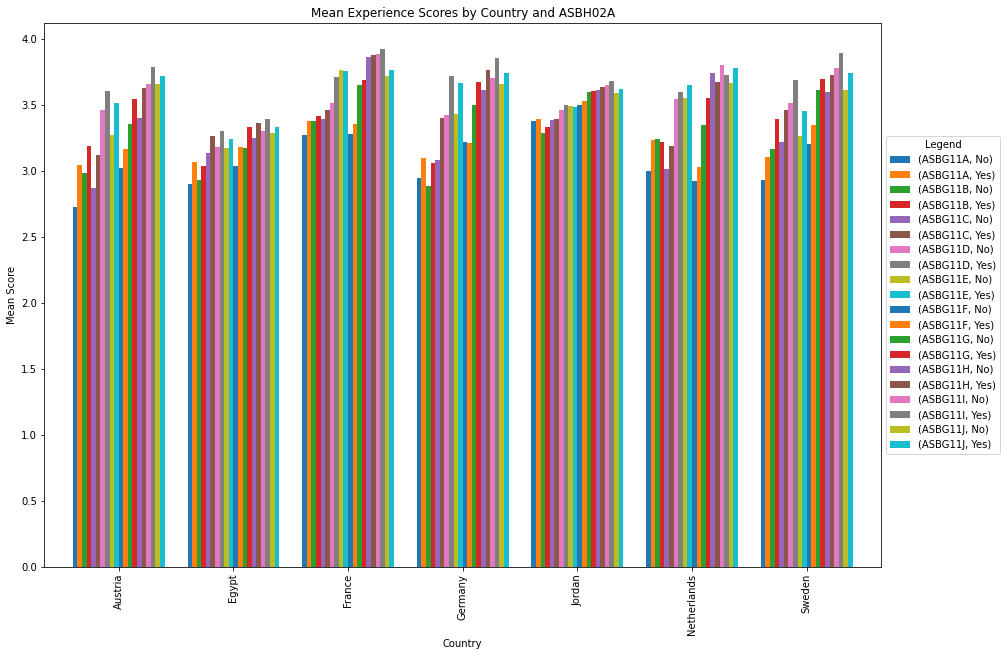

In [8]:
pivot_df_experience_unstacked = pivot_df_experienceinschool.unstack(level=1)
ax4 = pivot_df_experience_unstacked.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('Mean Experience Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

## need to do the df_no,df_yes trick here

I want to create a heatmap of the pivot table with country and immigrant status as indexes, which is sorted by country mean experience scores with the best scores at the top and the worst at the bottom and with the the country-born children's levels on top of those born elsewhere. 

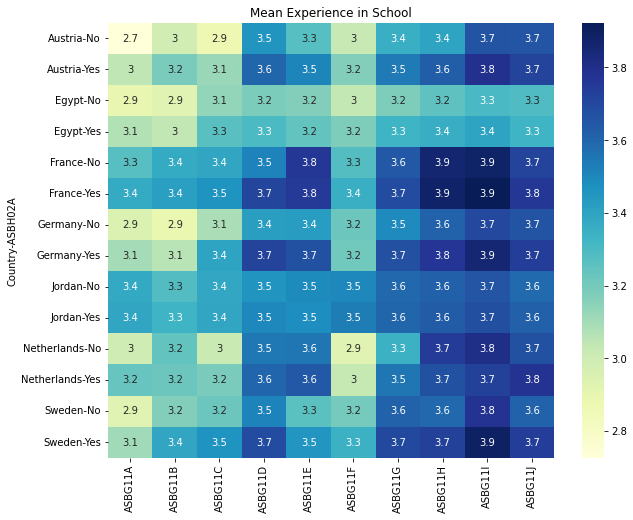

In [9]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_experienceinschool, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School')
plt.show()

In [10]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_df_experienceinschool.groupby(level='Country').mean()

In [11]:
# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

In [12]:
# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

In [13]:
### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [14]:
# Get the current index as a DataFrame for sorting
index_df = pivot_df_experienceinschool.index.to_frame()

In [15]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

In [16]:
# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

In [17]:
# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_experienceinschool.loc[index_df.index]

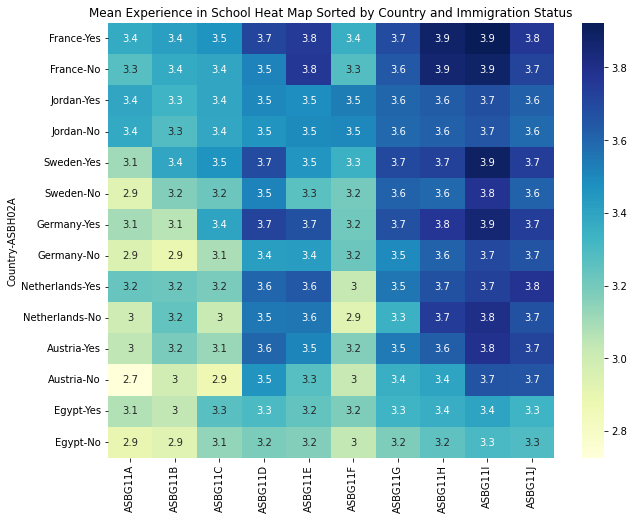

In [18]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never\
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\